# Import Library

In [ ]:
from google.colab import drive
import os
#mathplotlib untuk membuat grafik garis, scatter plot, histogram, dan banyak lainnya dari data yang dimiliki.
import matplotlib.pyplot as plt
#seaborn menangani permasalahan terkait visualisasi data secara statistik agar tampak lebih menarik.
import seaborn as sns
# numpy untuk proses komputasi numerik
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# untuk mengakses berbagai lapisan layer untuk membangun model CNN
from keras import layers
from keras.models import Model, Sequential
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import Adam

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Akses Drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


# Melihat folder direktori

In [ ]:
base_dir ='/content/drive/My Drive/waste detection/dataset_raw'
!ls "/content/drive/My Drive/waste detection/dataset_raw"

 Aluminium	 'Bungkus Plastik'   Galon   Kardus  'Sampah Elektronik'
'Botol Plastik'  'Cup Gelas'	     Kaca    Kertas  'Sampah Organik'


In [ ]:
clean_dir ='/content/drive/My Drive/waste detection/dataset_clean'

In [ ]:
# Membuat variabel untuk menampung folder ALL, TRAIN, dan TEST
TRAIN_dir = os.path.join(clean_dir, 'train')
VAL_dir = os.path.join(clean_dir, 'val')

In [ ]:
waste_list = os.listdir(base_dir)
num_of_waste = len(waste_list)
print('Total jenis sampah:', num_of_waste)

Total jenis sampah: 10


# Melihat jumlah data di folder direktori

In [ ]:
aluminium_dir = os.path.join(base_dir, 'Aluminium/')
botolPlastik_dir = os.path.join(base_dir, 'Botol Plastik/')
bungkusPlastik_dir = os.path.join(base_dir, 'Bungkus Plastik/')
cupGelas_dir = os.path.join(base_dir, 'Cup Gelas/')
galon_dir = os.path.join(base_dir, 'Galon/')
kaca_dir = os.path.join(base_dir, 'Kaca/')
kertas_dir = os.path.join(base_dir, 'Kertas/')
elektronik_dir = os.path.join(base_dir, 'Sampah Elektronik/')
organik_dir = os.path.join(base_dir, 'Sampah Organik/')
kardus_dir = os.path.join(base_dir, 'Kardus/')

print("Jumlah ALL Dataset Tiap Kelas")
print('Jumlah gambar Aluminium :', len(os.listdir(aluminium_dir)))
print('Jumlah gambar Botol Plastik :', len(os.listdir(botolPlastik_dir)))
print('Jumlah gambar Bungkus Plastik :', len(os.listdir(bungkusPlastik_dir)))
print('Jumlah gambar Cup Gelas :', len(os.listdir(cupGelas_dir)))
print('Jumlah gambar Galon :', len(os.listdir(galon_dir)))
print('Jumlah gambar Kaca :', len(os.listdir(kaca_dir)))
print('Jumlah gambar Kertas :', len(os.listdir(kertas_dir)))
print('Jumlah gambar Sampah Elektronik :', len(os.listdir(elektronik_dir)))
print('Jumlah gambar Sampah Organik :', len(os.listdir(organik_dir)))
print('Jumlah gambar Kardus :', len(os.listdir(kardus_dir)))

Jumlah ALL Dataset Tiap Kelas
Jumlah gambar Aluminium : 510
Jumlah gambar Botol Plastik : 500
Jumlah gambar Bungkus Plastik : 506
Jumlah gambar Cup Gelas : 500
Jumlah gambar Galon : 500
Jumlah gambar Kaca : 500
Jumlah gambar Kertas : 508
Jumlah gambar Sampah Elektronik : 500
Jumlah gambar Sampah Organik : 500
Jumlah gambar Kardus : 500


Visualisasi Data

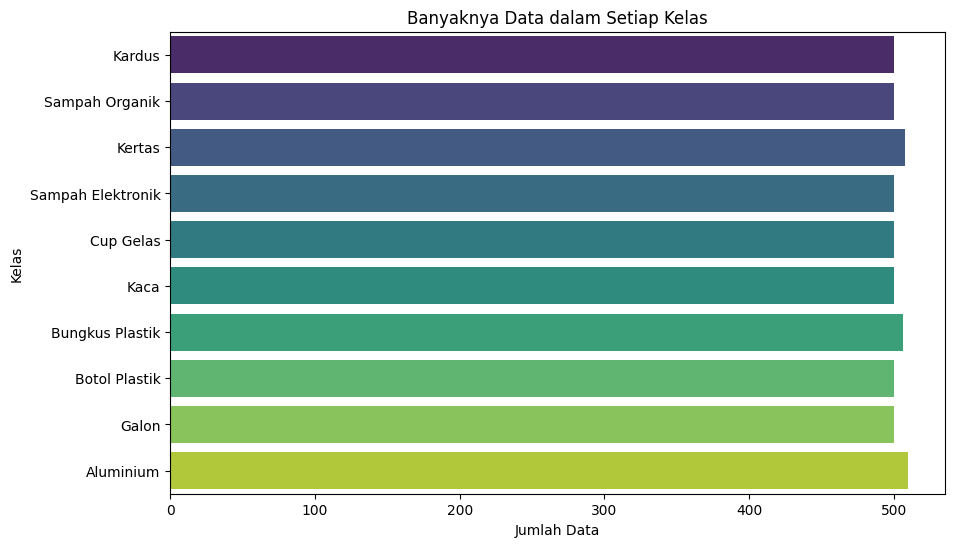

In [ ]:
data_count = {}

for class_folder in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        data_count[class_folder] = num_images

# Konversi data ke dalam bentuk yang sesuai untuk bar plot
myclasses = list(data_count.keys())
counts = list(data_count.values())

# Buat bar plot menggunakan matplotlib atau seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=myclasses, palette="viridis")
plt.title("Banyaknya Data dalam Setiap Kelas")
plt.xlabel("Jumlah Data")
plt.ylabel("Kelas")
plt.show()


# direktori TRAIN & TEST

In [ ]:
aluminium_train = os.path.join(TRAIN_dir, 'Aluminium/')
botolPlastik_train = os.path.join(TRAIN_dir, 'Botol Plastik/')
bungkusPlastik_train = os.path.join(TRAIN_dir, 'Bungkus Plastik/')
cupGelas_train = os.path.join(TRAIN_dir, 'Cup Gelas/')
galon_train = os.path.join(TRAIN_dir, 'Galon/')
kaca_train = os.path.join(TRAIN_dir, 'Kaca/')
kertas_train = os.path.join(TRAIN_dir, 'Kertas/')
elektronik_train = os.path.join(TRAIN_dir, 'Sampah Elektronik/')
organik_train = os.path.join(TRAIN_dir, 'Sampah Organik/')
kardus_train = os.path.join(TRAIN_dir, 'Kardus/')

print("Jumlah Data TRAIN Tiap Kelas")
print('Jumlah gambar Aluminium :', len(os.listdir(aluminium_train)))
print('Jumlah gambar Botol Plastik :', len(os.listdir(botolPlastik_train)))
print('Jumlah gambar Bungkus Plastik :', len(os.listdir(bungkusPlastik_train)))
print('Jumlah gambar Cup Gelas :', len(os.listdir(cupGelas_train)))
print('Jumlah gambar Galon :', len(os.listdir(galon_train)))
print('Jumlah gambar Kaca :', len(os.listdir(kaca_train)))
print('Jumlah gambar Kertas :', len(os.listdir(kertas_train)))
print('Jumlah gambar Sampah Elektronik :', len(os.listdir(elektronik_train)))
print('Jumlah gambar Sampah Organik :', len(os.listdir(organik_train)))
print('Jumlah gambar Kardus :', len(os.listdir(kardus_train)))

Jumlah Data TRAIN Tiap Kelas
Jumlah gambar Aluminium : 0
Jumlah gambar Botol Plastik : 0
Jumlah gambar Bungkus Plastik : 0
Jumlah gambar Cup Gelas : 0
Jumlah gambar Galon : 0
Jumlah gambar Kaca : 0
Jumlah gambar Kertas : 0
Jumlah gambar Sampah Elektronik : 0
Jumlah gambar Sampah Organik : 0
Jumlah gambar Kardus : 0


In [ ]:
aluminium_val = os.path.join(VAL_dir, 'Aluminium/')
botolPlastik_val = os.path.join(VAL_dir, 'Botol Plastik/')
bungkusPlastik_val = os.path.join(VAL_dir, 'Bungkus Plastik/')
cupGelas_val = os.path.join(VAL_dir, 'Cup Gelas/')
galon_val = os.path.join(VAL_dir, 'Galon/')
kaca_val = os.path.join(VAL_dir, 'Kaca/')
kertas_val = os.path.join(VAL_dir, 'Kertas/')
elektronik_val = os.path.join(VAL_dir, 'Sampah Elektronik/')
organik_val = os.path.join(VAL_dir, 'Sampah Organik/')
kardus_val = os.path.join(VAL_dir, 'Kardus/')

print("Jumlah Data VAL Tiap Kelas")
print('Jumlah gambar Aluminium :', len(os.listdir(aluminium_val)))
print('Jumlah gambar Botol Plastik :', len(os.listdir(botolPlastik_val)))
print('Jumlah gambar Bungkus Plastik :', len(os.listdir(bungkusPlastik_val)))
print('Jumlah gambar Cup Gelas :', len(os.listdir(cupGelas_val)))
print('Jumlah gambar Galon :', len(os.listdir(galon_val)))
print('Jumlah gambar Kaca :', len(os.listdir(kaca_val)))
print('Jumlah gambar Kertas :', len(os.listdir(kertas_val)))
print('Jumlah gambar Sampah Elektronik :', len(os.listdir(elektronik_val)))
print('Jumlah gambar Sampah Organik :', len(os.listdir(organik_val)))
print('Jumlah gambar Kardus :', len(os.listdir(kardus_val)))

Jumlah Data VAL Tiap Kelas
Jumlah gambar Aluminium : 0
Jumlah gambar Botol Plastik : 0
Jumlah gambar Bungkus Plastik : 0
Jumlah gambar Cup Gelas : 0
Jumlah gambar Galon : 0
Jumlah gambar Kaca : 0
Jumlah gambar Kertas : 0
Jumlah gambar Sampah Elektronik : 0
Jumlah gambar Sampah Organik : 0
Jumlah gambar Kardus : 0


# SPLITTING DATA

Random sampling adalah teknik pengambilan sampel dimana semua individu dalam populasi, baik secara sendiri-sendiri atau bersama-sama diberi kesempatan yang sama untuk dipilih sebagai anggota sampel.

In [ ]:
import random
# membantu mengotomatiskan proses penyalinan dan penghapusan file dan direktori.
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size


  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

# Jumlah pembagian data training & val
train_ratio = 0.8

# Pembagian Training & val

# Aluminium
sorces_00 = aluminium_dir
train_00 = aluminium_train
val_00 = aluminium_val
train_val_split(sorces_00, train_00, val_00, train_ratio)

# Botol Plastik
sorces_01 = botolPlastik_dir
train_01 = botolPlastik_train
val_01 = botolPlastik_val
train_val_split(sorces_01, train_01, val_01, train_ratio)

#Bungkus Plastik
sorces_02 = bungkusPlastik_dir
train_02 = bungkusPlastik_train
val_02 = bungkusPlastik_val
train_val_split(sorces_02, train_02, val_02, train_ratio)

# Cup Gelas
sorces_03 = cupGelas_dir
train_03 = cupGelas_train
val_03 = cupGelas_val
train_val_split(sorces_03, train_03, val_03, train_ratio)

# Galon
sorces_04 = galon_dir
train_04 = galon_train
val_04 = galon_val
train_val_split(sorces_04, train_04, val_04, train_ratio)

# Kaca
sorces_05 = kaca_dir
train_05 = kaca_train
val_05 = kaca_val
train_val_split(sorces_05, train_05, val_05, train_ratio)

# Kertas
sorces_06 = kertas_dir
train_06 = kertas_train
val_06 = kertas_val
train_val_split(sorces_06, train_06, val_06, train_ratio)

# Sampah Elekteronik
sorces_07 = elektronik_dir
train_07 = elektronik_train
val_07 = elektronik_val
train_val_split(sorces_07, train_07, val_07, train_ratio)

# Sampah Organik
sorces_08 = organik_dir
train_08 = organik_train
val_08 = organik_val
train_val_split(sorces_08, train_08, val_08, train_ratio)

# Kardus
sorces_10 = kardus_dir
train_10 = kardus_train
val_10 = kardus_val
train_val_split(sorces_10, train_10, val_10, train_ratio)

## Print Jumlah Data

In [ ]:
print('Jumlah ALL aluminium :', len(os.listdir(aluminium_dir)))
print('Jumlah Train aluminium :', len(os.listdir(aluminium_train)))
print('Jumlah val aluminium :', len(os.listdir(aluminium_val)))

print('\n')

print('Jumlah ALL Botol Plastik :', len(os.listdir(botolPlastik_dir)))
print('Jumlah Train Botol Plastik :', len(os.listdir(botolPlastik_train)))
print('Jumlah val Botol Plastik :', len(os.listdir(botolPlastik_val)))

print('\n')

print('Jumlah ALL Bungkus Plastik :', len(os.listdir(bungkusPlastik_dir)))
print('Jumlah Train Bungkus Plastik :', len(os.listdir(bungkusPlastik_train)))
print('Jumlah val Bungkus Plastik :', len(os.listdir(bungkusPlastik_val)))

print('\n')

print('Jumlah ALL Cup Gelas :', len(os.listdir(cupGelas_dir)))
print('Jumlah Train Cup Gelas :', len(os.listdir(cupGelas_train)))
print('Jumlah val Cup Gelas :', len(os.listdir(cupGelas_val)))

print('\n')

print('Jumlah ALL Galon :', len(os.listdir(galon_dir)))
print('Jumlah Train Galon :', len(os.listdir(galon_train)))
print('Jumlah val Galon :', len(os.listdir(galon_val)))

print('\n')

print('Jumlah ALL Kaca :', len(os.listdir(kaca_dir)))
print('Jumlah Train Kaca :', len(os.listdir(kaca_train)))
print('Jumlah val Kaca :', len(os.listdir(kaca_val)))

print('\n')

print('Jumlah ALL Kertas :', len(os.listdir(kertas_dir)))
print('Jumlah Train Kertas :', len(os.listdir(kertas_train)))
print('Jumlah val Kertas :', len(os.listdir(kertas_val)))

print('\n')

print('Jumlah ALL Sampah Elektronik :', len(os.listdir(elektronik_dir)))
print('Jumlah Train Sampah Elektronik :', len(os.listdir(elektronik_train)))
print('Jumlah val Sampah Elektronik :', len(os.listdir(elektronik_val)))

print('\n')

print('Jumlah ALL Sampah Organik :', len(os.listdir(organik_dir)))
print('Jumlah Train Sampah Organik :', len(os.listdir(organik_train)))
print('Jumlah val Sampah Organik :', len(os.listdir(organik_val)))


print('\n')

print('Jumlah ALL Kardus :', len(os.listdir(kardus_dir)))
print('Jumlah Train Kardus :', len(os.listdir(kardus_train)))
print('Jumlah val Kardus :', len(os.listdir(kardus_val)))

Jumlah ALL aluminium : 510
Jumlah Train aluminium : 408
Jumlah val aluminium : 102


Jumlah ALL Botol Plastik : 500
Jumlah Train Botol Plastik : 400
Jumlah val Botol Plastik : 100


Jumlah ALL Bungkus Plastik : 506
Jumlah Train Bungkus Plastik : 404
Jumlah val Bungkus Plastik : 102


Jumlah ALL Cup Gelas : 500
Jumlah Train Cup Gelas : 400
Jumlah val Cup Gelas : 100


Jumlah ALL Galon : 500
Jumlah Train Galon : 400
Jumlah val Galon : 100


Jumlah ALL Kaca : 500
Jumlah Train Kaca : 400
Jumlah val Kaca : 100


Jumlah ALL Kertas : 508
Jumlah Train Kertas : 406
Jumlah val Kertas : 102


Jumlah ALL Sampah Elektronik : 500
Jumlah Train Sampah Elektronik : 400
Jumlah val Sampah Elektronik : 100


Jumlah ALL Sampah Organik : 500
Jumlah Train Sampah Organik : 400
Jumlah val Sampah Organik : 100


Jumlah ALL Kardus : 500
Jumlah Train Kardus : 400
Jumlah val Kardus : 100


# Prerocessing

# Image Augmentation

- Image data generator adalah sebuah alat atau fungsi yang digunakan dalam pemrosesan citra dan pembelajaran mesin untuk menghasilkan dan mengelola dataset gambar. Tujuannya adalah untuk memfasilitasi pelatihan model pembelajaran mesin dengan menghasilkan data gambar yang bervariasi dan dapat meningkatkan kinerja model.

- Kode from tensorflow.keras.optimizers import Adam
- Adam (Adaptive Moment Estimation) adalah salah satu dari beberapa optimizer yang tersedia untuk mengoptimalkan model jaringan saraf tiruan saat pelatihan (meningkatkan efisiensi dan kecepatan konvergensi.)

Augmentasi data bertujuan agar mesin dapat belajar dan mengenali dari berbagai citra yang berbeda-beda sekaligus bisa dimanfaatkan untuk memperbanyak data. Pada kebanyakan kasus, penggunaan augmentasi data berhasil meningkatkan performa dari model. Peningkatan tersebut terjadi karena mesin berhasil mengenali lebih banyak objek dari bentuk dan pola yang beragam jenisnya.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, # mengonversi piksel dalam rentang [0,255] menjadi rentang [0,1].
    horizontal_flip = True, #untuk membalik posisi suatu citra secara horizontal
    vertical_flip = True,
    rotation_range=45,
    brightness_range=[0.8,1.0],
    fill_mode='nearest'
)

val_datagen =ImageDataGenerator( rescale=1./255 )

- Data Training, seperti namanya, data yang digunakan untuk training model. Sejauh ini kita telah melakukan tersebut.

- Data Validation, digunakan untuk proses validasi model dan mencegah overfitting.

- Data Testing, digunakan untuk testing model.

In [ ]:
#  flow from directory untuk membaca dan menampung seluruh data kedalam sebuah variabel.

BATCH_SIZE = 16
train_generator = train_datagen.flow_from_directory(
    TRAIN_dir, #hyperparameter berupa path directory yang berisi path directory
    target_size = (224,224), # besaran nilai pixel yang akan diambil dari citra yang akan dibaca.
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    color_mode='rgb'

)

validation_generator = val_datagen.flow_from_directory(
    VAL_dir,
    target_size = (224,224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    color_mode='rgb'

)


nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 4018 images belonging to 10 classes.
Found 1006 images belonging to 10 classes.
Classes: ['Aluminium', 'Botol Plastik', 'Bungkus Plastik', 'Cup Gelas', 'Galon', 'Kaca', 'Kardus', 'Kertas', 'Sampah Elektronik', 'Sampah Organik']


In [ ]:
train_generator.class_indices

{'Aluminium': 0,
 'Botol Plastik': 1,
 'Bungkus Plastik': 2,
 'Cup Gelas': 3,
 'Galon': 4,
 'Kaca': 5,
 'Kardus': 6,
 'Kertas': 7,
 'Sampah Elektronik': 8,
 'Sampah Organik': 9}

Menampilkan sample image dari train generator

In [ ]:
def show_image_samples(gen):
    train_dict=train_generator.class_indices
    classes=list(train_dict.keys())
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(30, 30))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i]
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

In [ ]:
show_image_samples(train_generator)

Output hidden; open in https://colab.research.google.com to view.

# Model CNN (Convolutional neural network)

- Model Sequential adalah salah satu tipe model dalam pembelajaran mesin dan deep learning yang digunakan untuk membangun arsitektur model secara berurutan atau sekuensial.
- model Sequential memungkinkan kita untuk membuat model secara bertahap atau sekuensial, lapisan demi lapisan, di mana output dari satu lapisan menjadi input untuk lapisan berikutnya.

## MobileNetV2

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False,
                         input_shape=(224, 224, 3))

base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

## MODEL SEQUENTIAL

In [ ]:
for layer in base_model.layers[:60]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.1)(x)
predictions = Dense(num_classes, activation="softmax")(x)

# Pastikan untuk membuat model dengan base_model.input sebagai input
model = Model(inputs=base_model.input, outputs=predictions)

model.summary() adalah sebuah metode yang digunakan untuk menghasilkan ringkasan (summary) dari model jaringan saraf tiruan (neural network) dalam TensorFlow Keras. Ringkasan ini memberikan informasi tentang arsitektur model, jumlah parameter, dan dimensi keluaran dari setiap lapisan dalam model.

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

model.compile() adalah metode yang digunakan untuk mengonfigurasi dan menentukan bagaimana model jaringan saraf tiruan (neural network) akan melakukan pelatihan

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
loss='categorical_crossentropy',
metrics = ['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
history = model.fit(train_generator,
               epochs=100,
               validation_data=validation_generator,
               callbacks=[callback])

Epoch 1/100
252/252 [==============================] - 942s 4s/step - loss: 0.8616 - accuracy: 0.7245 - val_loss: 0.5280 - val_accuracy: 0.8231
Epoch 2/100
252/252 [==============================] - 108s 430ms/step - loss: 0.3529 - accuracy: 0.8853 - val_loss: 0.2974 - val_accuracy: 0.9016
Epoch 3/100
252/252 [==============================] - 106s 420ms/step - loss: 0.2724 - accuracy: 0.9121 - val_loss: 0.2751 - val_accuracy: 0.9145
Epoch 4/100
252/252 [==============================] - 106s 421ms/step - loss: 0.2202 - accuracy: 0.9283 - val_loss: 0.2969 - val_accuracy: 0.9085
Epoch 5/100
252/252 [==============================] - 106s 422ms/step - loss: 0.1711 - accuracy: 0.9485 - val_loss: 0.2409 - val_accuracy: 0.9354
Epoch 6/100
252/252 [==============================] - 105s 417ms/step - loss: 0.1516 - accuracy: 0.9507 - val_loss: 0.1833 - val_accuracy: 0.9473
Epoch 7/100
252/252 [==============================] - 105s 416ms/step - loss: 0.1355 - accuracy: 0.9574 - val_loss: 0.22

## EVALUASI (TINGKAT AKURASI & LOSS MODEL)

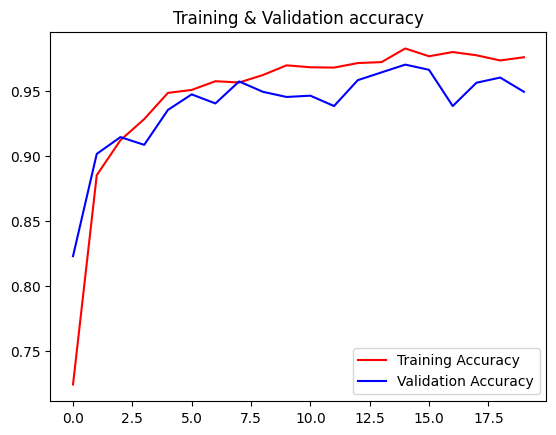

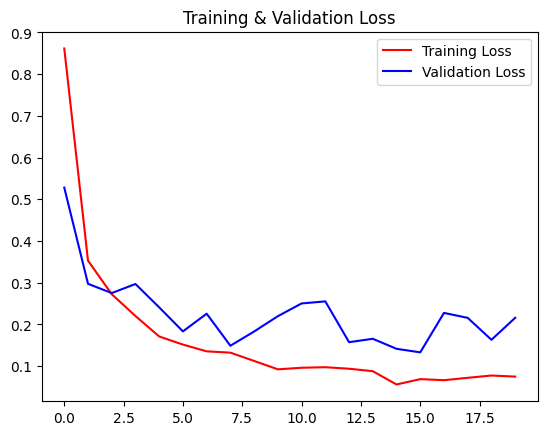

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(len(acc))

plt.plot(epoch, acc, 'r', label = 'Training Accuracy')
plt.plot(epoch, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training & Validation accuracy')
plt.legend(loc = 'best')
plt.show()


plt.plot(epoch, loss, 'r', label = 'Training Loss')
plt.plot(epoch, val_loss, 'b', label = 'Validation Loss')
plt.title('Training & Validation Loss')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

<ipython-input-24-0b1386c018fa>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validation_generator)


Val loss: 0.21580271422863007
Val accuracy: 0.9493041634559631


In [ ]:
# # Using the test dataset
# score = model.evaluate(test_generator)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# Percobaan Klasifikasi

## Upload Image

In [ ]:
waste_class = classes
print('\nKelas Sampah:\n{}'.format(waste_class))


Kelas Sampah:
['Aluminium', 'Botol Plastik', 'Bungkus Plastik', 'Cup Gelas', 'Galon', 'Kaca', 'Kardus', 'Kertas', 'Sampah Elektronik', 'Sampah Organik']


In [ ]:
from PIL import Image
from numpy import asarray

def preprocess_image_as_array(path, show_output):
    im = Image.open(path).convert('RGB')
    im = im.resize((224, 224))

    plt.figure(figsize=(8, 8))
    plt.imshow(im)
    plt.axis('off')

    image_as_array = np.expand_dims(asarray(im), axis=0)
    scaled_image_as_array = np.true_divide(image_as_array, 255)

    if show_output:
        print('Gambar {} selesai di proses.'.format(path))
    return scaled_image_as_array

def preprocess_and_predict(image_path, show_output=True):
    image_as_array = preprocess_image_as_array(image_path, show_output)
    pred = model.predict(image_as_array)
    sorted_ranks = np.flip(np.argsort(pred[0]))

    if show_output:
        rank = 1
        print('Prediksi Sampah:')
        for waste_rank in sorted_ranks:
            print('{:2}. {:16}: {:.3f}'.format(rank, waste_class[waste_rank], pred[0][waste_rank]))
            rank += 1
    print('')

Gambar /content/WhatsApp Image 2023-12-29 at 01.14.42.jpeg selesai di proses.
1/1 [==============================] - 1s 1s/step
Prediksi Sampah:
 1. Botol Plastik   : 0.793
 2. Sampah Elektronik: 0.125
 3. Galon           : 0.057
 4. Kardus          : 0.009
 5. Aluminium       : 0.008
 6. Cup Gelas       : 0.006
 7. Kertas          : 0.002
 8. Kaca            : 0.000
 9. Bungkus Plastik : 0.000
10. Sampah Organik  : 0.000



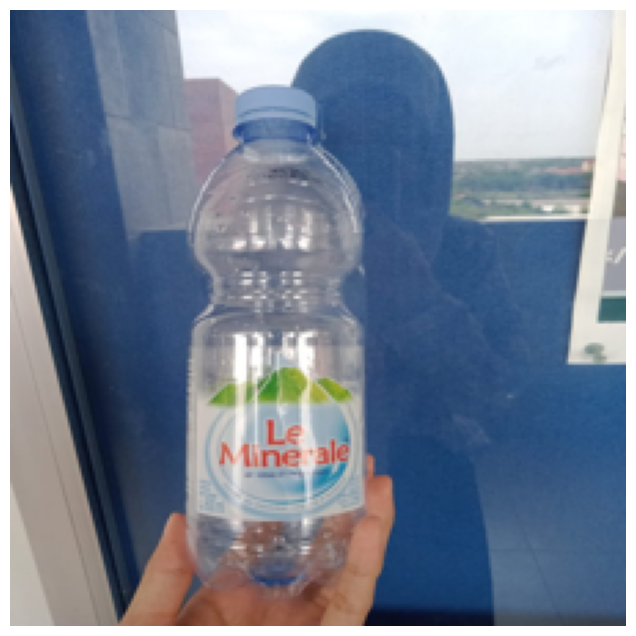

In [ ]:
IMAGE_PATH = "/content/WhatsApp Image 2023-12-29 at 01.14.42.jpeg"
preprocess_and_predict(IMAGE_PATH)

Gambar /content/cup.14.40.jpeg selesai di proses.
1/1 [==============================] - 0s 25ms/step
Prediksi Sampah:
 1. Cup Gelas       : 1.000
 2. Kardus          : 0.000
 3. Aluminium       : 0.000
 4. Kertas          : 0.000
 5. Botol Plastik   : 0.000
 6. Kaca            : 0.000
 7. Sampah Elektronik: 0.000
 8. Galon           : 0.000
 9. Sampah Organik  : 0.000
10. Bungkus Plastik : 0.000



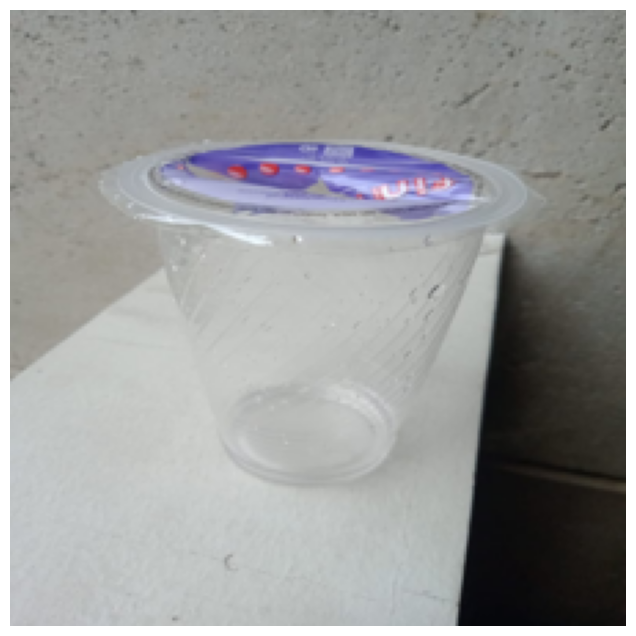

In [ ]:
IMAGE_PATH = "/content/cup.14.40.jpeg"
preprocess_and_predict(IMAGE_PATH)

Gambar /content/alu2.png selesai di proses.
1/1 [==============================] - 1s 768ms/step
Prediksi Sampah:
 1. Aluminium       : 1.000
 2. Cup Gelas       : 0.000
 3. Kardus          : 0.000
 4. Bungkus Plastik : 0.000
 5. Kertas          : 0.000
 6. Galon           : 0.000
 7. Sampah Elektronik: 0.000
 8. Sampah Organik  : 0.000
 9. Botol Plastik   : 0.000
10. Kaca            : 0.000



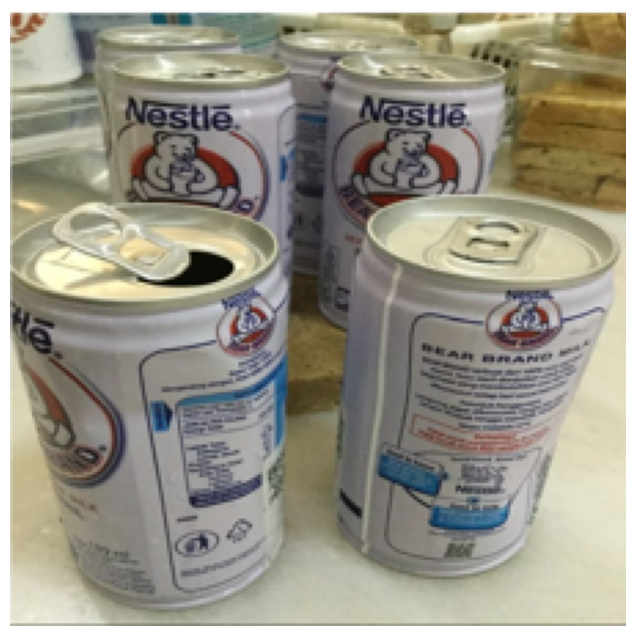

In [ ]:
IMAGE_PATH = "/content/alu2.png"
preprocess_and_predict(IMAGE_PATH)

# convert model ke h5

In [ ]:
from keras.models import load_model
model.save('/content/drive/My Drive/waste detection/ecogreenq2fix.h5')

In [ ]:
#load model
model = load_model('/content/drive/My Drive/waste detection/ecogreenq2fix.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
tflite_model = tf.keras.models.load_model("/content/drive/My Drive/waste detection/ecogreenq2fix.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_save = converter.convert()
open("/content/drive/MyDrive/waste detection/ecogreenq2fix.tflite", "wb").write(tflite_save)

3225408